In [17]:
import sys
module_path = 'C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT'
sys.path.insert(1, module_path)
import Meta_SCMT
import numpy as np
import matplotlib.pyplot as plt

# 1 modes forward process

In [18]:
GP = {
    'dim' : 1, #dim : 1 or 2.
    'modes' : 1, #number of modes with in a single waveguide. modes <= 2 is usually good enough.
    'period' : 0.28,
    'res' : 20, #resolution within one period
    'downsample_ratio': 1, #between (0, 1] for the output periodic resolution, it will be int(round(downsample_ratio * res))
    'wh' : 0.6, #waveguide height
    'lam' : 0.66,
    'n_sub' : 1.46, #the refractive index of substrate.
    'n_wg' : 2.4,# the refractive index of waveguide
    'h_min' : 0.06, #h_min, and h_max define the range of the width of waveguide.
    'h_max' : 0.27,
    'dh' : 0.01, #the step size of h.
    'path' : "sim_cache_TiO2_1mode/", #the inter state store path            
}
sim = Meta_SCMT.Sim(**GP)

# the phase lib seems different from FDTD results, need more investigation.

In [19]:
theta

0.2617993877991494

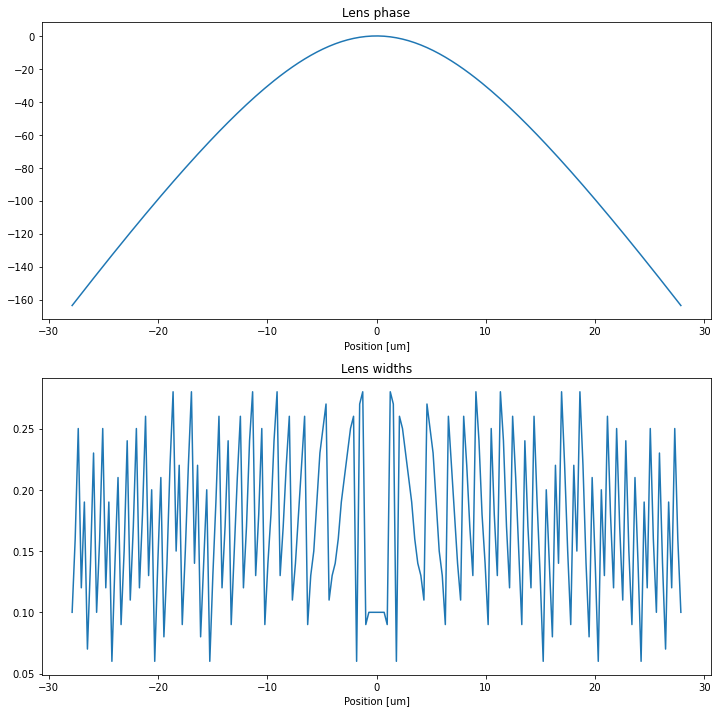

In [20]:
N = 200
theta = 15/180 * np.pi#unit [rad]
prop_dis = 0.25 * N * GP['period']
wgs = sim.PBA.design_lens(N, prop_dis, load = True)

coo_sparse generated.
coo_sparse generated.
dis model input generated.


C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\SCMT_1D.py:125: UserWarning: bad initial widths for waveguides.
  warnings.warn("bad initial widths for waveguides.")


initial widths larger than h_max, replaced by h_max
initialized by loaded h_paras.


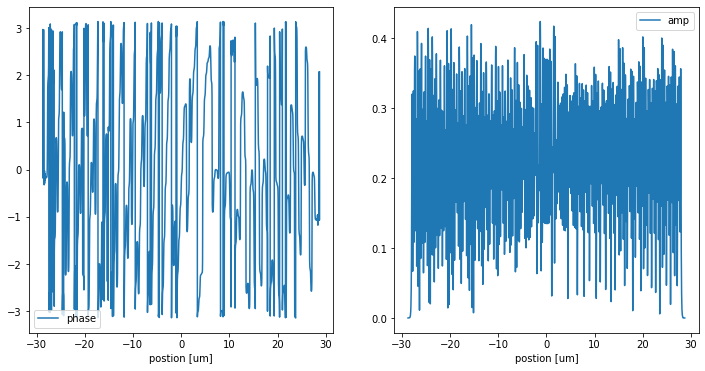

In [4]:
sim.scmt.init_model(N, prop_dis, COUPLING = True, init_hs= wgs, far_field= False)
E_out =sim.scmt.forward(theta = theta)
sim.scmt.vis_field(E_out)

In [5]:
E_1mode = E_out

# 2 modes

In [6]:
GP = {
    'dim' : 1, #dim : 1 or 2.
    'modes' : 2, #number of modes with in a single waveguide. modes <= 2 is usually good enough.
    'period' : 0.28,
    'res' : 20, #resolution within one period
    'downsample_ratio': 1, #between (0, 1] for the output periodic resolution, it will be int(round(downsample_ratio * res))
    'wh' : 0.6, #waveguide height
    'lam' : 0.66,
    'n_sub' : 1.46, #the refractive index of substrate.
    'n_wg' : 2.4,# the refractive index of waveguide
    'h_min' : 0.06, #h_min, and h_max define the range of the width of waveguide.
    'h_max' : 0.27,
    'dh' : 0.01, #the step size of h.
    'path' : "sim_cache_TiO2_2mode/", #the inter state store path            
}
sim = Meta_SCMT.Sim(**GP)

coo_sparse generated.
coo_sparse generated.
dis model input generated.
initial widths larger than h_max, replaced by h_max
initialized by loaded h_paras.


C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\SCMT_1D.py:125: UserWarning: bad initial widths for waveguides.
  warnings.warn("bad initial widths for waveguides.")


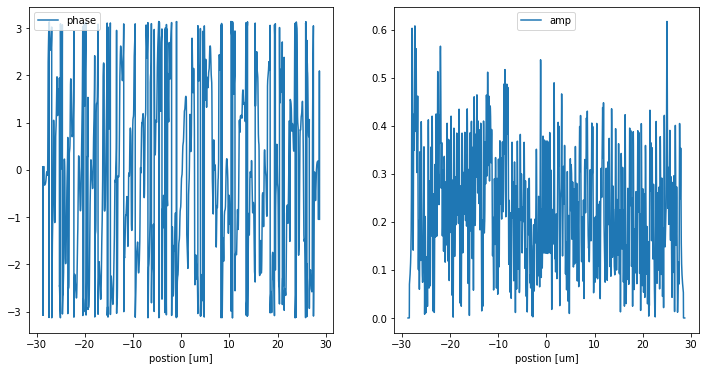

In [7]:
sim.scmt.init_model(N, prop_dis, COUPLING = True, init_hs= wgs, far_field= False)
E_out =sim.scmt.forward(theta = theta)
sim.scmt.vis_field(E_out)

In [8]:
E_2mode = E_out

# fullwave

Fullwave resolution: 50
total running time: 1.1007615120208131e-12
Initializing simulation...
Mesh step (micron): [2.00e-02, 2.00e-02, 2.00e-02].
Simulation domain in number of grid points: [2830, 1, 860].
Total number of computational grid points: 2.43e+06.
Total number of time steps: 31755.
Estimated data size (GB) of monitor monitor: 0.1116.
Estimated data size (GB) of monitor monitor_1: 0.0001.


C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\fullwave_1D.py:13: UserWarning: Fullwave is expensive and slow. Only do fullwave on small devices. And low resolution can be inaccurate.
  warnings.warn("Fullwave is expensive and slow. Only do fullwave on small devices. And low resolution can be inaccurate.")
C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\fullwave_1D.py:15: UserWarning: initial widths larger than h_max, bad initial widths for waveguides.
  warnings.warn("initial widths larger than h_max, bad initial widths for waveguides.")


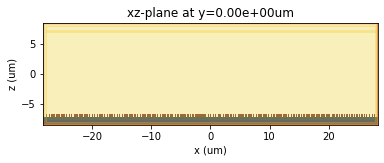

In [9]:
sim.fullwave.init_sim(prop_dis, N, wgs, res = 50, theta = theta)

In [12]:
sim.fullwave.upload(task_name="1D_lens_N" + str(N))
sim.fullwave.download(data_path="output_tidy3d/")

Using Tidy3D credentials from stored file
Uploading the json file...
Project '1D_lens_N200' status: success...                                  

Simulation domain Nx, Ny, Nz: [2830, 1, 860]
Applied symmetries: [0, 0, 0]
Number of computational grid points: 2.4338e+06.
Using subpixel averaging: True
Number of time steps: 31755
Automatic shutoff factor: 1.00e-05
Time step (s): 3.4665e-17

Compute source modes time (s):     0.1109
Compute monitor modes time (s):    0.1182

Rest of setup time (s):            0.5006

Starting solver...
- Time step    505 / time 1.75e-14s (  1 % done), field decay: 1.00e+00
- Time step   1270 / time 4.40e-14s (  4 % done), field decay: 1.00e+00
- Time step   2540 / time 8.80e-14s (  8 % done), field decay: 1.09e-01
- Time step   3810 / time 1.32e-13s ( 12 % done), field decay: 1.88e-02
- Time step   5080 / time 1.76e-13s ( 16 % done), field decay: 3.19e-03
- Time step   6350 / time 2.20e-13s ( 20 % done), field decay: 1.19e-03
- Time step   7621 / time 2.64

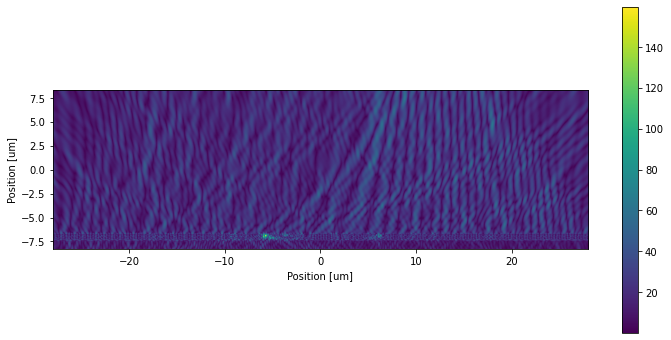

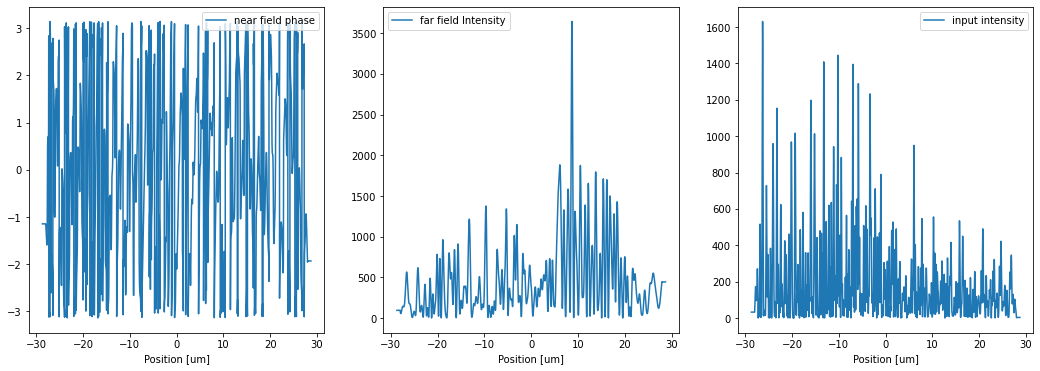

In [13]:
#Ey_xz_raw, data_near, data_far = sim.fullwave.vis_monitor(path = "output_tidy3d/" + "1D_lens_N" + str(N) + "/")
Ey_xz_raw, data_near, data_far = sim.fullwave.vis_monitor()

In [14]:
E_fullwave = data_near['Ey']

In [15]:
Ifw_far = np.abs(data_far['Ey'])**2

# for the near field, the mode1 phase is more accurate than mode2. the mode1 amp is less accurate than mode2.

In [16]:
def get_phase_offset(E1, E2):
    L2_dis = np.inf
    theta_opt = 0
    for theta in np.linspace(0, 2 * np.pi, 300):
        E_temp = E1 * np.exp(1j * theta)
        phase_temp = np.angle(E_temp)
        phase2 = np.angle(E2)
        dis_temp = ((phase_temp - phase2)**2).sum()
        if dis_temp < L2_dis:
            L2_dis = dis_temp
            theta_opt = theta
    print("minimum phase l2 dis:", L2_dis)
    return theta_opt

In [17]:
b = 50
ph1_offset = get_phase_offset(E_1mode[b:-b], E_fullwave[b:-b])
ph2_offset = get_phase_offset(E_2mode[b:-b], E_fullwave[b:-b])

minimum phase l2 dis: 23306.883633087986
minimum phase l2 dis: 23099.811056050123


In [18]:
print(ph1_offset, ph2_offset)

4.602065492549596 4.665107485598221


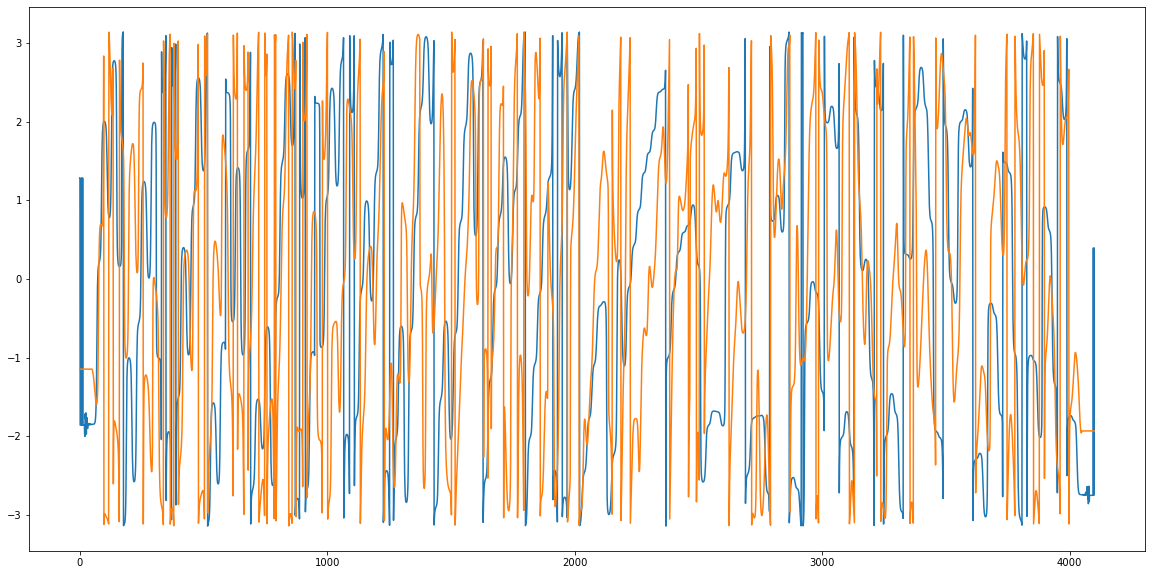

In [19]:
plt.figure(figsize = (20, 10))
plt.plot(np.angle(E_1mode * np.exp(1j * ph1_offset)))
plt.plot(np.angle(E_fullwave))

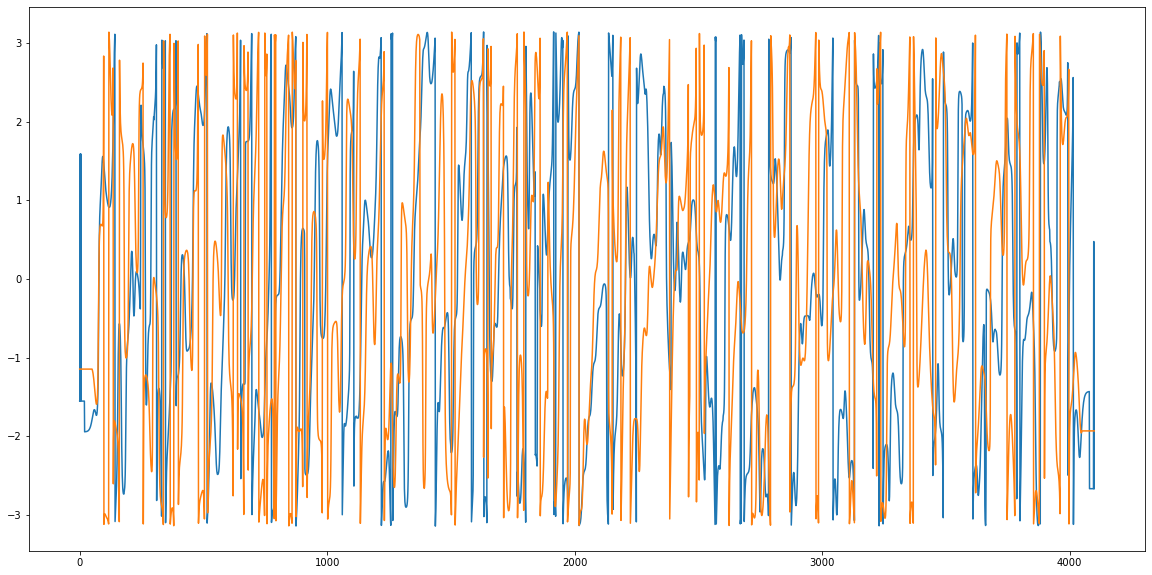

In [20]:
plt.figure(figsize = (20, 10))
plt.plot(np.angle(E_2mode * np.exp(1j * ph2_offset)))
plt.plot(np.angle(E_fullwave))

In [21]:
def normalize(x):
    x = np.abs(x)
    x = x/x.max()
    return x

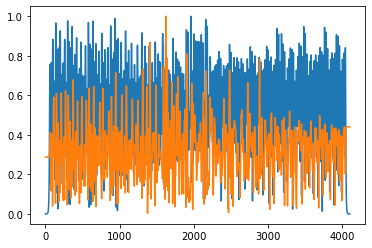

In [22]:
plt.plot(normalize(E_1mode))
plt.plot(normalize(E_fullwave))

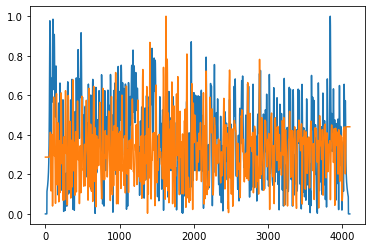

In [23]:
plt.plot(normalize(E_2mode))
plt.plot(normalize(E_fullwave))

In [24]:
def mse(x1, x2):
    size = x1.size
    mse = np.sqrt(((x1 - x2)**2).sum()/size)
    return mse

In [25]:
mse(normalize(E_1mode), normalize(E_fullwave))

0.3534084315019496

In [26]:
mse(normalize(E_2mode), normalize(E_fullwave))

0.2556760031337567

# compare far field

coo_sparse generated.
coo_sparse generated.
dis model input generated.


C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\SCMT_1D.py:125: UserWarning: bad initial widths for waveguides.
  warnings.warn("bad initial widths for waveguides.")


initial widths larger than h_max, replaced by h_max
initialized by loaded h_paras.


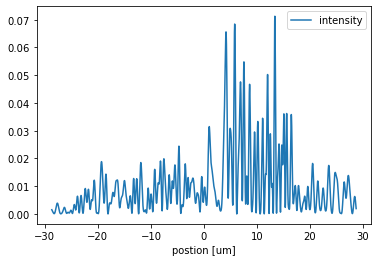

In [21]:
GP = {
    'dim' : 1, #dim : 1 or 2.
    'modes' : 1, #number of modes with in a single waveguide. modes <= 2 is usually good enough.
    'period' : 0.28,
    'res' : 20, #resolution within one period
    'downsample_ratio': 1, #between (0, 1] for the output periodic resolution, it will be int(round(downsample_ratio * res))
    'wh' : 0.6, #waveguide height
    'lam' : 0.66,
    'n_sub' : 1.46, #the refractive index of substrate.
    'n_wg' : 2.4,# the refractive index of waveguide
    'h_min' : 0.06, #h_min, and h_max define the range of the width of waveguide.
    'h_max' : 0.27,
    'dh' : 0.01, #the step size of h.
    'path' : "sim_cache_TiO2_1mode/", #the inter state store path            
}
sim = Meta_SCMT.Sim(**GP)

sim.scmt.init_model(N, prop_dis, COUPLING = True, init_hs= wgs, far_field= True)
E_out =sim.scmt.forward(theta = theta)
sim.scmt.vis_field(E_out)
I1_far = E_out

coo_sparse generated.
coo_sparse generated.
dis model input generated.


C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\SCMT_1D.py:125: UserWarning: bad initial widths for waveguides.
  warnings.warn("bad initial widths for waveguides.")


initial widths larger than h_max, replaced by h_max
initialized by loaded h_paras.


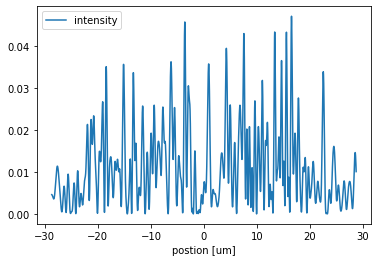

In [28]:
GP = {
    'dim' : 1, #dim : 1 or 2.
    'modes' : 2, #number of modes with in a single waveguide. modes <= 2 is usually good enough.
    'period' : 0.28,
    'res' : 20, #resolution within one period
    'downsample_ratio': 1, #between (0, 1] for the output periodic resolution, it will be int(round(downsample_ratio * res))
    'wh' : 0.6, #waveguide height
    'lam' : 0.66,
    'n_sub' : 1.46, #the refractive index of substrate.
    'n_wg' : 2.4,# the refractive index of waveguide
    'h_min' : 0.06, #h_min, and h_max define the range of the width of waveguide.
    'h_max' : 0.27,
    'dh' : 0.01, #the step size of h.
    'path' : "sim_cache_TiO2_2mode/", #the inter state store path            
}
sim = Meta_SCMT.Sim(**GP)

sim.scmt.init_model(N, prop_dis, COUPLING = True, init_hs= wgs, far_field= True)
E_out =sim.scmt.forward(theta = theta)
sim.scmt.vis_field(E_out)
I2_far = E_out

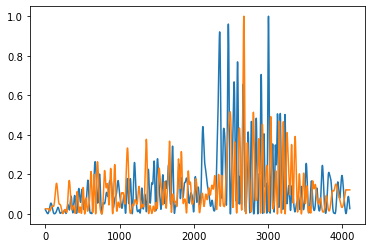

In [29]:
plt.plot(normalize(I1_far))
plt.plot(normalize(Ifw_far))

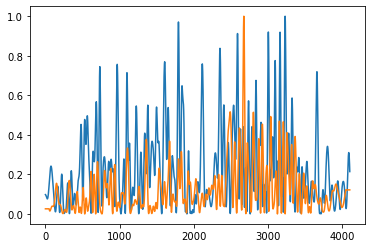

In [30]:
plt.plot(normalize(I2_far))
plt.plot(normalize(Ifw_far))

In [31]:
mse(normalize(I2_far), normalize(Ifw_far))

0.2540511972781651

In [32]:
mse(normalize(I1_far), normalize(Ifw_far))

0.18361847426317607

In [10]:
Ez_meep = np.load("../meep_simulation\sim_lens_N200_theta15.00/Ez.npy")

In [11]:
Ez_meep.dtype

dtype('complex128')

Text(0.5, 0, 'position [um]')

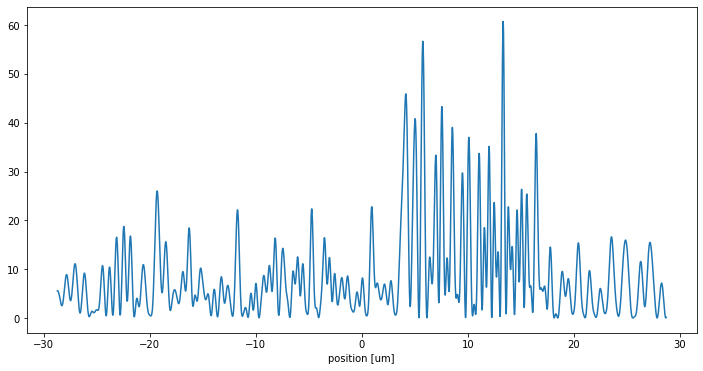

In [14]:
res = 50
lam = 0.66
Iz_data = (np.abs(Ez_meep)**2).transpose()
Iz_data = np.flip(Iz_data)
dx = 1/res
#focal_plane_index = int(round((lam + h_wg + prop_dis)/dx))
focal_plane_index = int(round((lam)/dx))
focal_plane = Iz_data[focal_plane_index]
pos_x = (np.arange(0, focal_plane.shape[0]) - focal_plane.shape[0]/2) * dx
np.save("../meep_simulation/sim_lens_N200_theta15.00/focal_plane_intensity.npy", focal_plane)
plt.figure(figsize = (12, 6))
plt.plot(pos_x, focal_plane)
plt.xlabel("position [um]")

In [22]:
I1_far.shape

(4100,)

In [23]:
focal_plane.shape

(2872,)

Text(0.5, 0, 'position [um]')

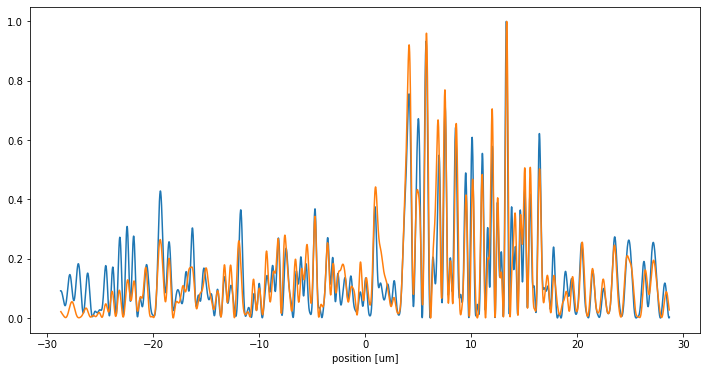

In [28]:
plt.figure(figsize = (12, 6))
plt.plot(pos_x, focal_plane/focal_plane.max())
pos_x_cmt = (np.arange(0, I1_far.shape[0]) - I1_far.shape[0]/2) * (0.28/20)
plt.plot(pos_x_cmt, I1_far/I1_far.max())
plt.xlabel("position [um]")